In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
import sys
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
import sys
sys.path.append("../Function")
import function


In [28]:
df = pd.read_excel("../../site_info_ver_4.xlsx")

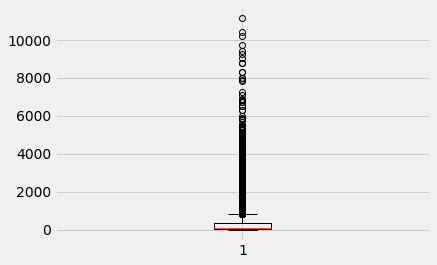

In [29]:
dataset = df.copy()
dataset = dataset.loc[(dataset['region_North']==1) ]
# dataset_train.set_index("Date",inplace=True)
dataset[['so2','nox','pm10','pm2.5', 'is_Site_exceeded_nox', 'is_Site_exceeded_so2', 'is_Site_exceeded_pm10', 'is_Site_exceeded_pm2.5']].isna().sum()
dataset.drop(['so2','nox','pm10','pm2.5','is_Site_exceeded_nox', 'is_Site_exceeded_so2', 'is_Site_exceeded_pm10', 'is_Site_exceeded_pm2.5'],axis=1,inplace=True)
dataset = function.remove_unique_one(dataset)
dataset = function.remove_high_corr(dataset, 'Israelis_Count')
dataset = function.remove_outliers(dataset , 'Israelis_Count')
dataset = function.split_date(dataset)
tmp = dataset.Israelis_Count
dataset.drop('Israelis_Count',axis=1,inplace=True)
dataset['Israelis_Count']=tmp

In [31]:
dataset.drop(['Date','Site_Name','Total'], axis=1, inplace=True)

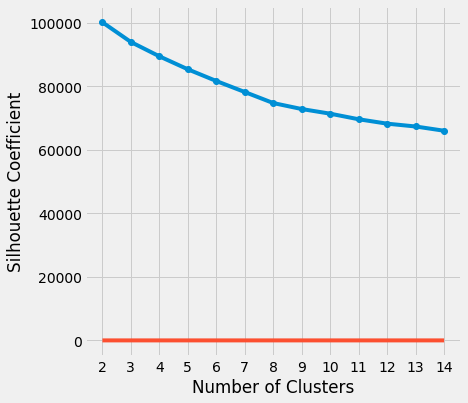

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

dataset = function.remove(dataset , 'Date')
tmp = dataset
y = tmp.Israelis_Count.values
X = np.array(tmp.drop('Israelis_Count',axis=1))

X_train, X_test, Y_train, Y_test = train_test_split(
 X, y, test_size=0.30, random_state=42)

x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()

X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_test_scaler.fit_transform(X_test)

sse = []
list_k = list(range(2, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
silhouette_coefficients = []

kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [11]:
tmp

,region_Central,region_South,is_weekend,operations,is_jewish_holiday,is_muslims_holiday,is_muslims_vacation,is_camping,special_activity,visit_duration,...,Beer-Sheva_so2_exceeded,Tel_Aviv-Yafo_nox_exceeded,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Green_border,Season_autumn,Season_spring,Season_winter,Total,Israelis_Count
4,1,0,0,0,0,0,0,0,0,3,...,0,1,1,1,0,0,0,1,33,33
12,1,0,0,0,0,0,0,0,0,3,...,0,1,1,1,0,0,0,1,23,23
17,1,0,0,0,0,0,0,0,0,3,...,0,1,1,1,0,0,0,1,12,12
25,1,0,0,0,0,0,0,0,0,3,...,0,1,1,1,0,0,0,1,5,5
32,1,0,0,0,0,0,0,0,0,3,...,0,1,1,1,0,0,0,1,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109096,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,0,0,0,3,3
109097,0,0,0,0,0,0,1,0,0,1,...,0,1,1,1,1,0,0,0,4,4
109099,0,0,0,0,0,0,1,0,0,1,...,0,1,1,1,1,0,0,0,6,6
109102,0,0,0,0,0,0,1,0,0,1,...,0,1,1,1,1,0,0,0,2,2


In [ ]:
tmp.drop(['Tourists_Count','Israelis_Count','Total'],axis=1).columns

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Instantiate the model: KMeans from sklearn
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

# Fit to the training data
kmeans.fit(X_train_scaled)

train_df = pd.DataFrame(X_train_scaled,columns= function.remove(tmp ,'Israelis_Count').columns)


# Generate out clusters
train_cluster = kmeans.predict(train_df)
print(set(train_cluster))
# Add the target and predicted clusters to our training DataFrame
# train_df.insert(2,'Y house price of unit area',Y_train) 
train_df.insert(loc=len(train_df.columns),column='cluster',value = train_cluster) 
train_df.insert(loc=len(train_df.columns),column='y',value = Y_train)

n_clusters=2
train_clusters_df = []
for i in range(n_clusters):
    train_clusters_df.append(train_df[train_df['cluster']==i])
    
# colors = ['red','green']
# plt.rcParams['figure.figsize'] = [14, 7]
# plt.rc('font', size=12)

# # Plot X_train again with features labeled by cluster
# for i in range(n_clusters):
#   subset = []
#   for count,row in enumerate(X_train):
#       if(train_cluster[count]==i):
#         subset.append(row)

#   x = [row[0] for row in subset]
#   y = [row[1] for row in subset]
#   plt.scatter(x,y,c=colors[i],label="cluster "+ str(i+1))
# plt.title("Train Data Clusters", x=0.6, y=0.95)
# plt.xlabel("X3 distance to the nearest MRT station")
# plt.ylabel("X2 house age")
# plt.legend()
# plt.show()

{0, 1}


In [35]:
type(train_clusters_df)

list

In [36]:
train_clusters_df[0].iloc[:,:-2]

,is_weekend,operations,is_jewish_holiday,is_muslims_holiday,is_muslims_vacation,special_activity,visit_duration,is_jewishHeritage,is_muslimsHeritage,is_archaeology,...,Haifa_pm2.5_exceeded,Tel_Aviv-Yafo_nox_exceeded,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Season_autumn,Season_spring,Season_winter,day,month,year
0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.100000,0.000000,0.8
2,1.0,0.0,0.0,0.0,1.0,0.0,0.333333,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.100000,0.545455,0.8
3,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.933333,0.000000,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.066667,0.545455,0.2
6,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.500000,0.545455,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37184,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.333333,0.181818,1.0
37189,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.733333,0.363636,0.0
37192,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.700000,0.909091,0.4
37195,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.600000,0.272727,0.4


In [37]:


n_clusters=2
cluster_svr = []
model = SVR(kernel='rbf')

for i in range(n_clusters):
    cluster_X = np.array((train_clusters_df[i].iloc[:,:-2]).values)
    cluster_Y = (train_clusters_df[i])['y'].values
    cluster_svr.append(model.fit(cluster_X, cluster_Y))

In [38]:
clusters_pred = kmeans.predict(X_test)
cluster_svr

[SVR(), SVR()]

In [39]:
def regression_function(arr, kmeans, cluster_svr):
    result = []
    clusters_pred = kmeans.predict(arr)
    print(clusters_pred)
    for i,data in enumerate(arr):
        #print(data)
        result.append(((cluster_svr[clusters_pred[i]]).predict([data]))[0])
    return result

In [40]:
Y_svr_k_means_pred = regression_function(X_test,
	kmeans, cluster_svr)

[1 1 1 ... 1 1 1]


In [41]:
result_df = pd.DataFrame(X_test,columns=train_clusters_df[0].columns[:-2])
result_df['Y true value'] =  Y_test
result_df['Y SVR + K means'] = Y_svr_k_means_pred
result_df.head(-5)



,is_weekend,operations,is_jewish_holiday,is_muslims_holiday,is_muslims_vacation,special_activity,visit_duration,is_jewishHeritage,is_muslimsHeritage,is_archaeology,...,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Season_autumn,Season_spring,Season_winter,day,month,year,Y true value,Y SVR + K means
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,8.0,8.0,2020.0,40,136.846245
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,12.0,3.0,2018.0,33,136.846245
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,11.0,2.0,2021.0,13,136.846245
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,20.0,3.0,2021.0,215,136.846245
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,14.0,5.0,2021.0,56,136.846245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15933,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,15.0,9.0,2019.0,7,136.846245
15934,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,28.0,6.0,2016.0,15,136.846245
15935,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,20.0,7.0,2017.0,68,136.846245
15936,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,25.0,3.0,2019.0,11,136.846245


In [54]:
import sys
sys.path.append("../Function")
import function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


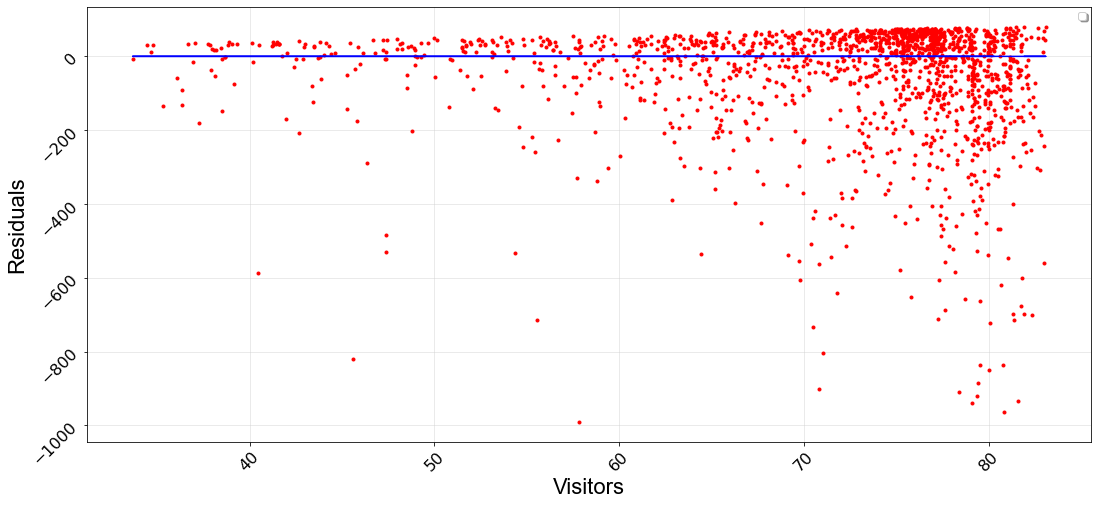

In [76]:
function.plot_residuals(result_df['Y SVR + K means'] , result_df['Y true value'])

In [77]:
function.get_rmse(result_df['Y SVR + K means'] , result_df['Y true value'])

171.723627490889